In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.0+cu121'

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

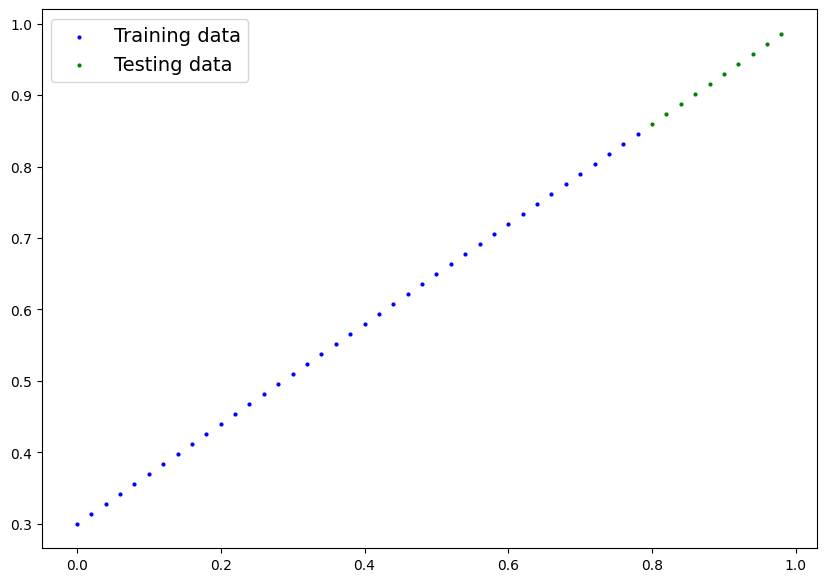

In [ ]:
plot_predictions();

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [ ]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


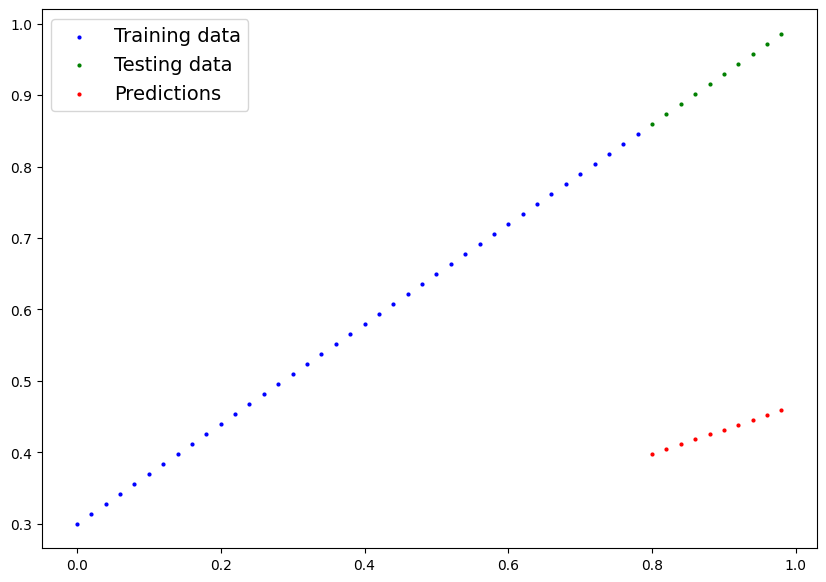

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [ ]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)
    #print(f"Loss: {loss}")
    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    #Testing code
    # Put the model in evaluation mode
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss =loss_fn(test_pred,y_test)

    if epoch%10==0:
      epoch_count.append(epoch)
      train_loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch:{epoch}| Loss: {loss}| Test Loss: {test_loss}")
      print(model_0.state_dict())






Epoch:0| Loss: 0.31288138031959534| Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10| Loss: 0.1976713240146637| Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20| Loss: 0.08908725529909134| Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:30| Loss: 0.053148526698350906| Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:40| Loss: 0.04543796554207802| Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch:50| Loss: 0.04167863354086876| Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:60| Loss: 0.03818932920694351| Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch:70| Loss:

In [ ]:
import numpy as np
np.array(torch.tensor(train_loss_values).cpu().numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

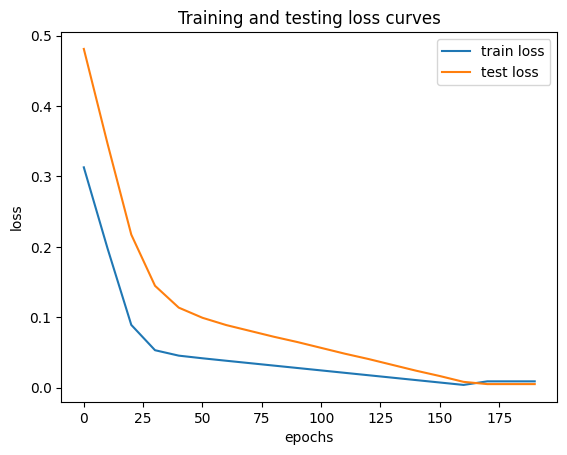

In [ ]:
#plot the loss values
plt.plot(epoch_count,np.array(torch.tensor(train_loss_values).cpu().numpy()) ,label="train loss")
plt.plot(epoch_count,test_loss_values,label="test loss")
plt.title("Training and testing loss curves")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

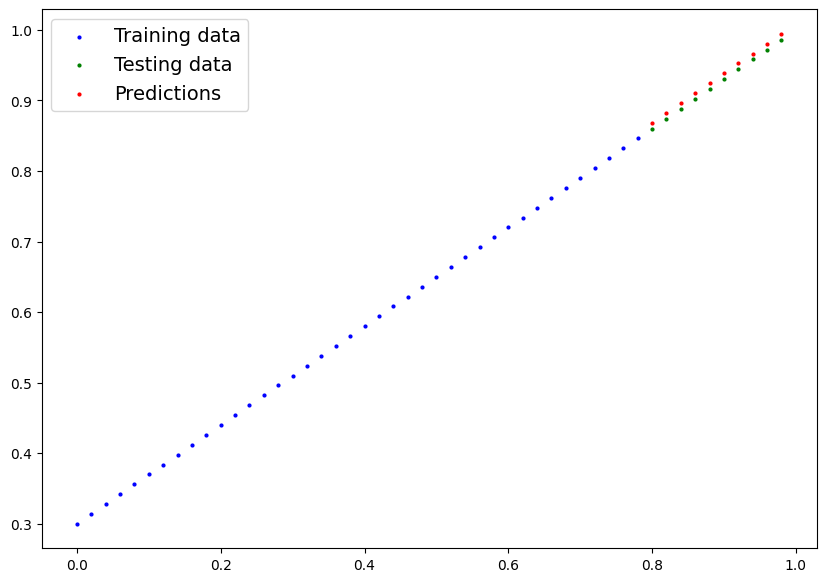

In [ ]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
plot_predictions(predictions = y_preds_new)

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
MODEL_NAME=  "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model_0.state_dict(),
         f=MODEL_SAVE_PATH)

In [ ]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f =MODEL_SAVE_PATH))

<ipython-input-56-c9e3be82bb53>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f =MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

PUT IT ALL TOGETHER


In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device



'cpu'

In [ ]:
weight = 0.1
bias = 0.2
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim =1)
y = weight* X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2020],
         [0.2040],
         [0.2060],
         [0.2080],
         [0.2100],
         [0.2120],
         [0.2140],
         [0.2160],
         [0.2180]]))

In [ ]:
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]

In [ ]:
X_test,y_test = X[train_split:],y[train_split:]

In [ ]:
len(X_train)

40

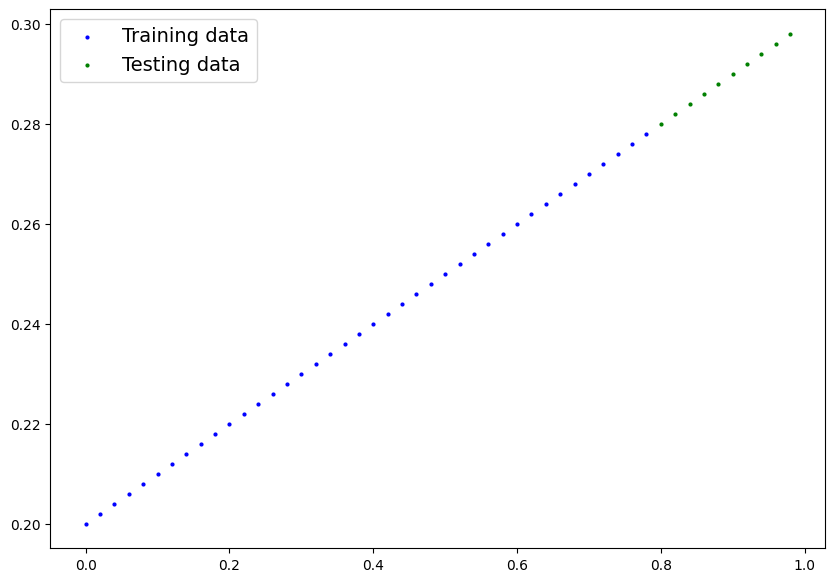

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test)

In [ ]:
class LinearRegressionModel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self,x:torch.Tensor):
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModel2()
model_1,model_1.state_dict()

(LinearRegressionModel2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2020],
         [0.2040],
         [0.2060],
         [0.2080],
         [0.2100],
         [0.2120],
         [0.2140],
         [0.2160],
         [0.2180]]))

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(42)
epochs = 500
for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred,y_test)
  if epoch%10==0:
    print(f"Epoch:{epoch}| Loss: {loss}| Test Loss: {test_loss}")

Epoch:0| Loss: 0.0025669089518487453| Test Loss: 0.00826477725058794
Epoch:10| Loss: 0.0025669089518487453| Test Loss: 0.00826477725058794
Epoch:20| Loss: 0.0025669089518487453| Test Loss: 0.00826477725058794
Epoch:30| Loss: 0.0025669089518487453| Test Loss: 0.00826477725058794
Epoch:40| Loss: 0.0025669089518487453| Test Loss: 0.00826477725058794
Epoch:50| Loss: 0.0025669089518487453| Test Loss: 0.00826477725058794
Epoch:60| Loss: 0.0025669089518487453| Test Loss: 0.00826477725058794
Epoch:70| Loss: 0.0025669089518487453| Test Loss: 0.00826477725058794
Epoch:80| Loss: 0.0025669089518487453| Test Loss: 0.00826477725058794
Epoch:90| Loss: 0.0025669089518487453| Test Loss: 0.00826477725058794
Epoch:100| Loss: 0.0025669089518487453| Test Loss: 0.00826477725058794
Epoch:110| Loss: 0.0025669089518487453| Test Loss: 0.00826477725058794
Epoch:120| Loss: 0.0025669089518487453| Test Loss: 0.00826477725058794
Epoch:130| Loss: 0.0025669089518487453| Test Loss: 0.00826477725058794
Epoch:140| Loss: 

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.1053]])),
             ('linear_layer.bias', tensor([0.2005]))])

In [ ]:
weight,bias

(0.1, 0.2)

In [ ]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.2847],
        [0.2868],
        [0.2889],
        [0.2910],
        [0.2932],
        [0.2953],
        [0.2974],
        [0.2995],
        [0.3016],
        [0.3037]])

In [ ]:
y_test

tensor([[0.2800],
        [0.2820],
        [0.2840],
        [0.2860],
        [0.2880],
        [0.2900],
        [0.2920],
        [0.2940],
        [0.2960],
        [0.2980]])

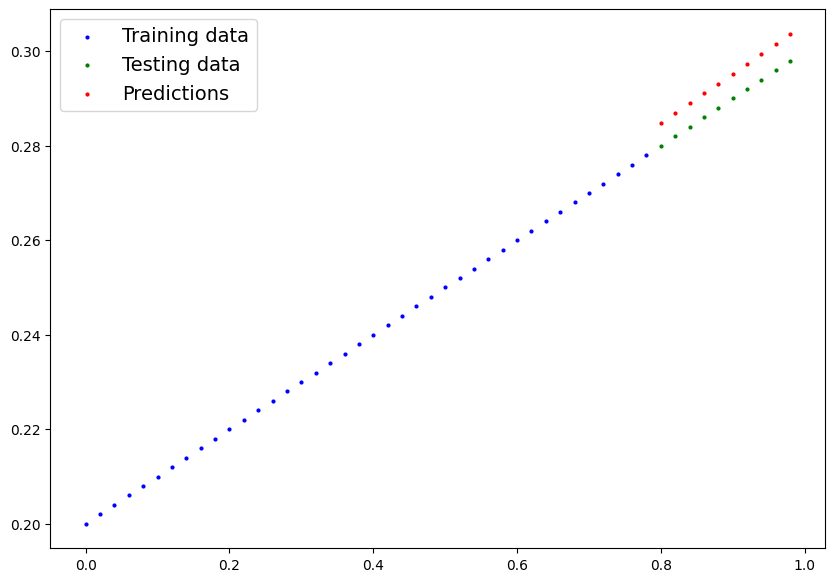

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
MODEL_NAME=  "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model_1.state_dict(),
         f=MODEL_SAVE_PATH)


In [ ]:
device

'cpu'